In [1]:
import numpy as np
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
class SIGNAL(Enum):
    PLETH = 0
    ABP = 1

dataset = np.load('../dataset/2312271100_dataset.npy', allow_pickle=True)
ppoints = np.load('../dataset/2312271100_pleth_points.npy', allow_pickle=True)
apoints = np.load('../dataset/2312271100_abp_points.npy', allow_pickle=True)
print(dataset.shape, ppoints.shape, apoints.shape)

(468, 625, 2) (468, 3) (468, 3)


In [3]:
pleth = dataset[:,:,SIGNAL.PLETH.value]
abp = dataset[:,:,SIGNAL.ABP.value]
print(pleth.shape, abp.shape)

(468, 625) (468, 625)


# feature

##### Pulse 내 특징
- `pulse start` $y_0$
- `pulse systolic peak` $y_1$
- `pulse start-peak mid` $y_2$
- `pulse dicrotic notch` $y_3$
- `pulse diastolic peak` $y_4$
- `pulse end` $y_5$
- `time interval` $t_n$
- `area` $a_{nm}$
- `slope` $s_{nm}$

##### Pulse 간 특징
- `time interval` $t_n$
- `area` $a_{nm}$
- `slope` $s_{nm}$

##### Additional
- `Statistics` $stat_0$

### Get additional points

peak를 중심으로 최초 peak부터 그 다음 valley를 연결, 마지막 peak와 연결할 valley가 없으면 종료.

In [5]:
y_sys = ppoints[5,0]
y_sys

array([ 70, 136, 195, 266, 329, 401, 465, 526], dtype=int32)

In [7]:
y_start = ppoints[5,0]
y_end = ppoints[5,2][np.where(ppoints[5,2] > y_sys[0])]

In [45]:
x = np.arange(y_1[0], y_5[0])

In [51]:
pleth[5,y_1[0]]

1.166277061189889

In [48]:
y = m*x + pleth[5,y_1[0]]

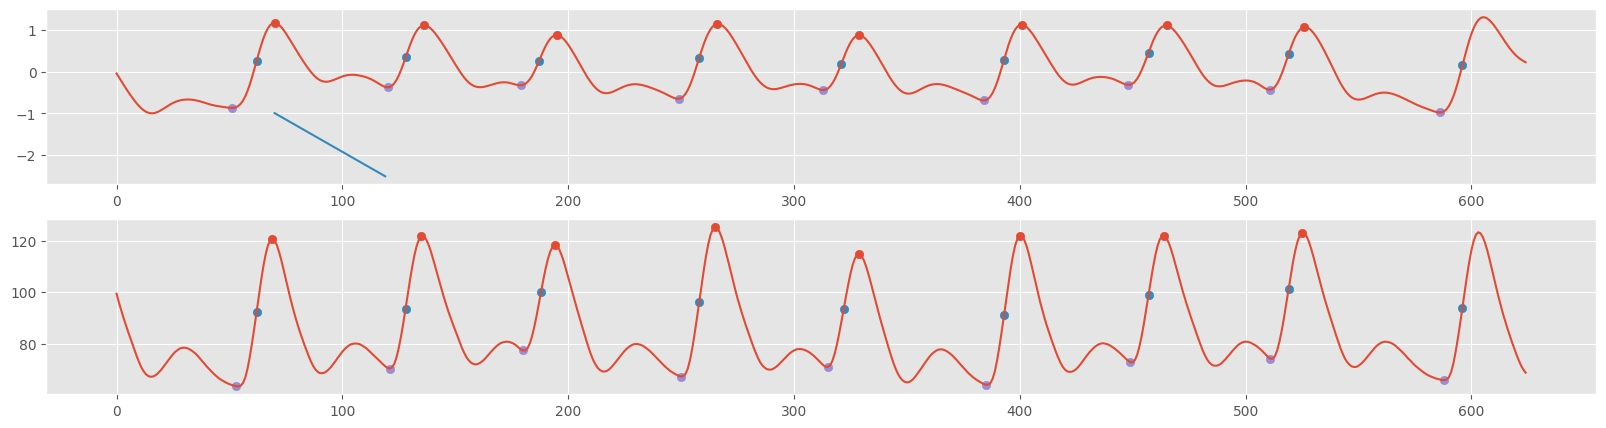

In [49]:
IDX = 5
fig, axs = plt.subplots(2,1,figsize=(20,5))
axs[0].plot(pleth[IDX])
axs[0].scatter(ppoints[IDX,0], pleth[IDX,ppoints[IDX,0]])
axs[0].scatter(ppoints[IDX,1], pleth[IDX,ppoints[IDX,1]])
axs[0].scatter(ppoints[IDX,2], pleth[IDX,ppoints[IDX,2]])
axs[0].plot(x, y)
axs[1].plot(abp[IDX])
axs[1].scatter(apoints[IDX,0], abp[IDX,apoints[IDX,0]])
axs[1].scatter(apoints[IDX,1], abp[IDX,apoints[IDX,1]])
axs[1].scatter(apoints[IDX,2], abp[IDX,apoints[IDX,2]])
plt.show()

In [15]:
ppoints[IDX,0].size, ppoints[IDX,1].size, ppoints[IDX,2].size

(8, 9, 9)

In [6]:
IDX = 0
ppoints[IDX,0]

array([ 51, 117, 192, 256, 326, 386, 465, 540])